<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_109/blob/main/Semana4_Actividad_team_109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semana 4**

## A01794067 - José Antonio Mendoza Castro
## A00642541 - Miguel Angel Aguilera Rodríguez

### **Ciencia y analítica de datos**

### **Prof. Jobish Vallikavungal D.**

### 2022-10-11


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import scale

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Parte 1: Ejercicio guiado**

### Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

*   Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.



In [5]:
df = pd.read_csv('default of credit card clients.csv')

#### De acuerdo con la información de atributos:

#### **Variables categóricas**: X2 (género), X3 (educación), X4 (estatus marital), X6-X11 (historial de pago)

#### **Variables numéricas**: X1 (cantidad de crédito otorgado), X5 (edad), X12-X17 (montos en el estado de cuenta), X18-X23 (montos pagados)

#### Para el número mínimo de componentes sólo consideraremos las variables númericas.

In [6]:
cols = ['X1', 'X5'] + list(df.columns[12:-1])

In [7]:
print(cols)

['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [8]:
df_pca = df[cols].copy()

#### Antes de realizar el PCA se realizará limpieza en los datos seleccionados. Comportamiento de los *missing values*

In [9]:
df_pca.isnull().sum()

X1      0
X5      5
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
dtype: int64

#### Para el caso de la variable X5 (edad) se le imputará la media.

In [10]:
mean_age = df_pca['X5'].mean()
df_pca['X5'] = df_pca['X5'].fillna(mean_age) 

#### Dado que de la variable X12 en adelante son valores que están relacionados al ser parte del historial de pago de cada usuario no sería correcto imputar algún valor, por lo que se eliminarán.

In [11]:
cols = df_pca.columns[2:]

In [12]:
df_pca.dropna(subset = cols, inplace = True)

#### Volvemos a revisar los datos.

In [13]:
df_pca.isnull().sum()

X1     0
X5     0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

#### Observamos el comportamiento general de los datos a los que le vamos a aplicar el **PCA**.

In [14]:
df_pca.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29974.000000,29974.000000,29974.000000,29974.000000,2.997400e+04,29974.000000,29974.000000,29974.000000,29974.00000,2.997400e+04,29974.000000,29974.000000,29974.000000,29974.000000
mean,167540.858077,35.481532,51246.906986,49202.807300,4.703716e+04,43284.435244,40332.919363,38892.705945,5665.37359,5.925095e+03,5227.969540,4828.825682,4801.736338,5219.370488
std,129743.276052,9.214270,73659.887824,71197.639676,6.937218e+04,64354.238336,60816.733748,59573.602328,16568.81184,2.305044e+04,17613.401376,15672.450541,15284.174846,17784.653663
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.250000,2986.000000,2.670250e+03,2330.500000,1764.250000,1256.250000,1000.00000,8.360000e+02,390.000000,297.250000,254.250000,119.250000
50%,140000.000000,34.000000,22385.500000,21209.500000,2.008950e+04,19052.000000,18112.500000,17078.500000,2100.00000,2.009500e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67209.750000,64064.500000,6.018725e+04,54573.000000,50226.500000,49239.500000,5006.75000,5.000000e+03,4509.500000,4014.000000,4037.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.00000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


#### Por lo que tendríamos 14 variables

In [15]:
len(df_pca.columns)

14

#### Ahora ejecutaremos el **PCA** a la vez que normalizamos nuestros datos.

In [16]:
pca = PCA()

In [17]:
pca.fit(df_pca)

PCA()

In [18]:
df_pca_summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                               'Proportion of variance': pca.explained_variance_ratio_,
                               'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})

In [19]:
df_pca_summary = df_pca_summary.transpose()
df_pca_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,166559.577236,115831.110445,37249.520782,27741.305094,20693.974244,20273.666547,18518.478030,17036.189129,16289.853727,11613.056937,10411.620440,8784.753152,8197.114543,9.113845e+00
Proportion of variance,0.610502,0.295256,0.030534,0.016936,0.009424,0.009045,0.007547,0.006387,0.005840,0.002968,0.002386,0.001698,0.001479,1.827894e-09
Cumulative proportion,0.610502,0.905757,0.936292,0.953227,0.962651,0.971696,0.979243,0.985630,0.991470,0.994438,0.996823,0.998521,1.000000,1.000000e+00


#### De acuerdo con los resultados podríamos considerar que el número mínimo de componentes que representan la mayor parte de la varianza son 4.

#### Lo anterior de acuerdo a lo que se sugiere en el capítulo 8 de *Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow* de Aurelien Gerón.

### Paso 2: Interprete cada componente principal en términos de las variables originales

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [20]:
df_pca_components = pd.DataFrame(pca.components_.transpose(),
                                 columns = df_pca_summary.columns,
                                 index = df_pca.iloc[:, :].columns)

df_pca_components.iloc[:, :4].round(4)

,0,1,2,3
X1,0.4912,0.8692,-0.0206,-0.0184
X5,0.0000,0.0000,-0.0000,-0.0000
X12,0.3885,-0.2212,-0.5489,-0.2049
X13,0.3815,-0.2262,-0.3909,-0.0377
X14,0.3723,-0.2164,-0.0481,0.5534
X15,0.3465,-0.1939,0.2610,0.0792
X16,0.3230,-0.1767,0.4281,-0.2001
X17,0.3086,-0.1672,0.4837,-0.3084
X18,0.0266,0.0057,0.0375,0.1936
X19,0.0313,0.0108,0.1600,0.6732


* En términos de magnitud y dirección PC1 está dominado por la variable X1 (cantidad otorgada de crédito) con dirección positiva.

* En términos de magnitud y dirección PC2 está dominado por la variable X1 (cantidad otorgada de crédito) con dirección positiva.

* En términos de magnitud y dirección PC3 está dominado por la variable X12 (saldo en el estado de cuenta en septiembre 2005) con dirección negativa.

* En términos de magnitud y dirección PC4 está dominado por la variable X19 (cantidad pagada en agosto de 2005) con dirección positiva.

### Paso 3: Identifique valores atípicos

* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

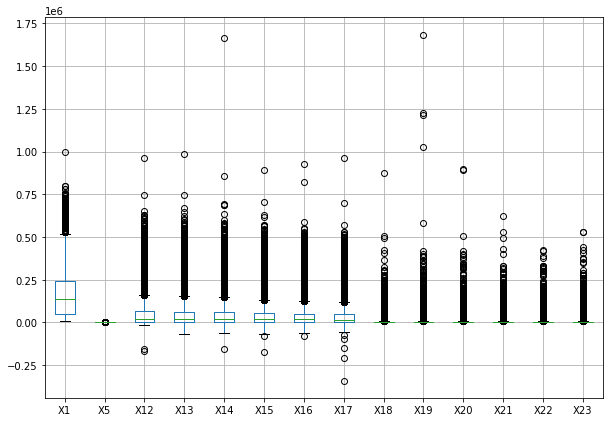

In [28]:
fig = plt.figure(figsize = (10, 7))
df_pca.boxplot()
plt.show()

### **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**




### 1.   ¿Cuál es el número de componentes mínimo y por qué?

### **Son cuatro componentes mínimos**

### 2.   ¿Cuál es la variación de los datos que representan esos componentes?


### 3. ¿Cuál es la pérdida de información después de realizar PCA?


### 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?


### 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

